<a href="https://colab.research.google.com/github/golu10/projects/blob/master/wine%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             points         price
count  82657.000000  77088.000000
mean      88.544564     36.922232
std        3.099649     43.698346
min       80.000000      4.000000
25%       86.000000     18.000000
50%       88.000000     27.000000
75%       91.000000     45.000000
max      100.000000   3300.000000
user_name                15
country                  38
review_title          76983
review_description    77628
designation           26424
points                   21
price                   351
province                358
region_1               1019
region_2                 17
winery                13786
variety                  28
dtype: int64


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


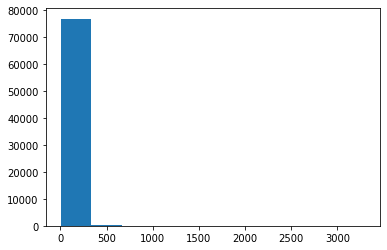

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('/content/Knight ML Assignment/Data/train.csv')
print(data.describe())
print(data.nunique())
plt.hist(data['price'])
plt.show()


Testarossa               175
Louis Latour             168
Williams Selyem          165
Chateau Ste. Michelle    163
Georges Duboeuf          163
                        ... 
Marimar Estate            54
Dunham                    54
L. Tramier & Fils         54
Merry Edwards             54
Thomas Fogarty            54
Name: winery, Length: 100, dtype: int64


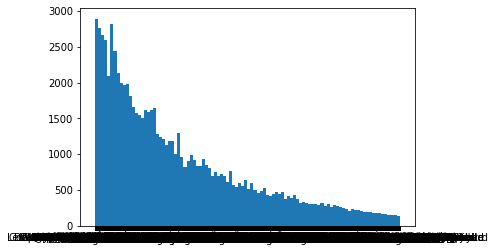

In [3]:
print(data['winery'].value_counts().head(100))
plt.hist(data['winery'],bins=100)
plt.show()

         user_name country  ...      winery     variety
count        63264   82622  ...       82657       82657
unique          15      38  ...       13786          28
top     @vossroger      US  ...  Testarossa  Pinot Noir
freq         17539   38573  ...         175       10587

[4 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 


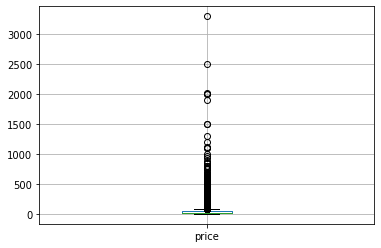

In [4]:
print(data.describe(exclude='number'))
print(data.info())
data[['price']].boxplot()
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


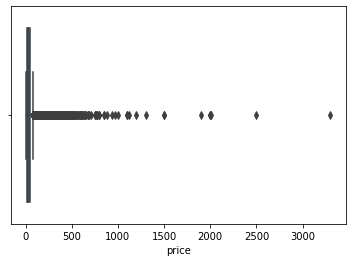

In [5]:
import seaborn as sns
sns.boxplot(x=data['price'])
plt.show()

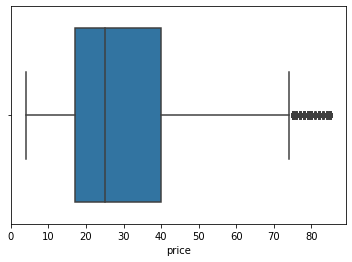

In [7]:
q1=data2['price'].quantile(0.25)
q2=data2['price'].quantile(0.75)
iqr=q2-q1
q11,q22=q1-(1.5*iqr),q2+(1.5*iqr)
data1=data2[(data2['price']<q22) & (data2['price']>q11)]
sns.boxplot(x=data1['price'])
plt.show()



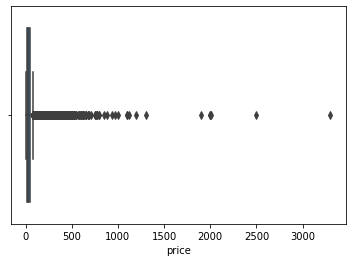

In [6]:
Q1=data['points'].quantile(0.25)
Q2=data['points'].quantile(0.75)
IQR=Q2-Q1
Q11,Q22=Q1-(1.5*IQR),Q2+(1.5*IQR)
data2=data[(data['points']<Q22)&(data['points']>Q11)]
sns.boxplot(data2['price'])
plt.show()

In [8]:
print(data1.info())
data1=data1.drop(labels=['user_name','review_title','review_description','designation','region_1','region_2'],axis=1)
print(data1.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73185 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           55419 non-null  object 
 1   country             73154 non-null  object 
 2   review_title        73185 non-null  object 
 3   review_description  73185 non-null  object 
 4   designation         51946 non-null  object 
 5   points              73185 non-null  int64  
 6   price               73185 non-null  float64
 7   province            73154 non-null  object 
 8   region_1            61588 non-null  object 
 9   region_2            34332 non-null  object 
 10  winery              73185 non-null  object 
 11  variety             73185 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.3+ MB
None
Index(['country', 'points', 'price', 'province', 'winery', 'variety'], dtype='object')


In [9]:
counts=data1.country.value_counts()
rem=counts[counts<50].index
mask=data1.country.isin(rem)
data1.country[mask]='Other'



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
data1['country'].fillna('Other',inplace=True)
print(data1.country.value_counts())
print(data1.country.isnull().sum())

US              36928
France          11607
Italy            7144
Chile            2799
Portugal         2768
Spain            2594
Argentina        2435
Austria          1567
Germany          1430
New Zealand      1073
Australia         964
South Africa      658
Other             381
Israel            304
Canada            168
Greece            137
Bulgaria           92
Romania            79
England            57
Name: country, dtype: int64
0


In [11]:
print(data1.info())
print(data1.nunique())
print(data1.province.value_counts().head(70))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73185 entries, 0 to 82656
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   73185 non-null  object 
 1   points    73185 non-null  int64  
 2   price     73185 non-null  float64
 3   province  73154 non-null  object 
 4   winery    73185 non-null  object 
 5   variety   73185 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.9+ MB
None
country        19
points         19
price          82
province      349
winery      12846
variety        28
dtype: int64
California         24368
Washington          5916
Oregon              3791
Tuscany             2997
Bordeaux            2957
                   ...  
Rapel Valley          91
Hawke's Bay           88
Judean Hills          78
Limarí Valley         75
Thracian Valley       73
Name: province, Length: 70, dtype: int64


In [12]:
countss=data1.province.value_counts()
remm=countss[countss<100].index
Mask=data1.province.isin(remm)
data1.province[Mask]='Outskirt'



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
data1['province'].fillna('Outskirt',inplace=True)
print(data1.province.value_counts())
print(data1.province.isnull().sum())

California          24368
Washington           5916
Oregon               3791
Outskirt             3507
Tuscany              2997
                    ...  
Pfalz                 116
British Columbia      116
Cachapoal Valley      114
Central Otago         114
Idaho                 112
Name: province, Length: 66, dtype: int64
0


In [0]:
countries=pd.get_dummies(data1['country'],drop_first=True)
provinces=pd.get_dummies(data1['province'],drop_first=True)
y=pd.get_dummies(data1['variety']).values
X=pd.concat([countries,provinces,data1['points'],data1['price']],axis=1).values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [0]:
X=mms.fit_transform(X)
from keras.models import Sequential
from keras.layers import Dense
classifier=Sequential()
classifier.add(Dense(60,activation='relu',input_shape=(85,)))
classifier.add(Dense(60,activation='relu'))
classifier.add(Dense(28,activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(X,y,epochs=200,batch_size=5)


Epoch 1/200
73185/73185 [==============================] - 42s 574us/step - loss: 1.8461 - accuracy: 0.4115
Epoch 2/200
73185/73185 [==============================] - 42s 573us/step - loss: 1.7513 - accuracy: 0.4306
Epoch 3/200
73185/73185 [==============================] - 42s 574us/step - loss: 1.7346 - accuracy: 0.4344
Epoch 4/200
73185/73185 [==============================] - 42s 571us/step - loss: 1.7256 - accuracy: 0.4362
Epoch 5/200
73185/73185 [==============================] - 43s 582us/step - loss: 1.7181 - accuracy: 0.4378
Epoch 6/200
73185/73185 [==============================] - 42s 569us/step - loss: 1.7136 - accuracy: 0.4385
Epoch 7/200
73185/73185 [==============================] - 41s 564us/step - loss: 1.7099 - accuracy: 0.4394
Epoch 8/200
73185/73185 [==============================] - 41s 564us/step - loss: 1.7059 - accuracy: 0.4409
Epoch 9/200
73185/73185 [==============================] - 42s 568us/step - loss: 1.7036 - accuracy: 0.4389
Epoch 10/200
73185/73185 [==